In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("review_rating_data.xlsx")
df.head()

,Unnamed: 0,full_reviews,ratings
0,0,First of all thanks to flipkart for excellent ...,2
1,1,"overall good product, mobile colour is good i ...",5
2,2,This mobile has good features but battery does...,4
3,3,I GOT THIS PHONE WITH SUPERB EXCHANGE DEAL\n\n...,5
4,4,I gift this to my mom. The joy in her eyes tel...,5


In [3]:
df.columns

Index(['Unnamed: 0', 'full_reviews', 'ratings'], dtype='object')

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [5]:
df.columns

Index(['full_reviews', 'ratings'], dtype='object')

In [6]:
print('Info of rating prediction',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20163 entries, 0 to 20162
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_reviews  20163 non-null  object
 1   ratings       20163 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 315.2+ KB
Info of rating prediction None


In [7]:
df.isnull().sum()

full_reviews    0
ratings         0
dtype: int64

In [8]:
df.describe()

,ratings
count,20163.000000
mean,4.303774
std,1.132489
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


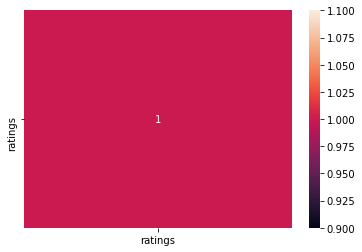

In [9]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Data Exploration by Visualizations

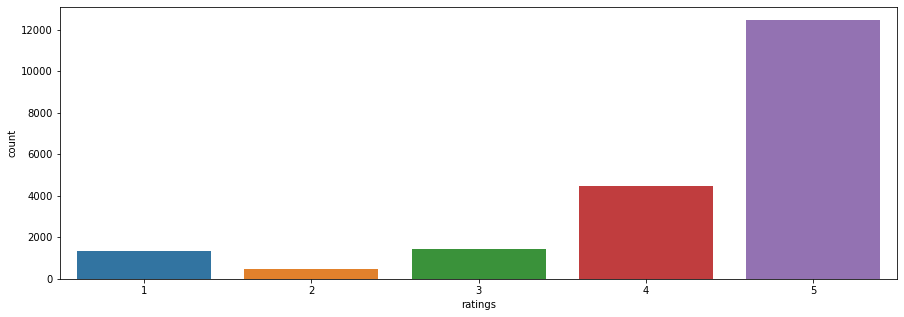

In [10]:
f, axes = plt.subplots( figsize=(15,5))

ax1 = sns.countplot(df['ratings'])
#ax1.set(xlabel='ratings', ylabel='Counts', title="Rating Counts")

In [11]:
## Drop missing values
df.dropna(inplace=True)
#df = df[df['ratings']!= 3]
df['Positively_Rated'] = np.where(df['ratings']>3, 2,1)
df.head(10)

,full_reviews,ratings,Positively_Rated
0,First of all thanks to flipkart for excellent ...,2,1
1,"overall good product, mobile colour is good i ...",5,2
2,This mobile has good features but battery does...,4,2
3,I GOT THIS PHONE WITH SUPERB EXCHANGE DEAL\n\n...,5,2
4,I gift this to my mom. The joy in her eyes tel...,5,2
5,I have used this phone continuously last 7 day...,5,2
6,What a mobile amazing battery back up also. Lo...,5,2
7,Very nice phone and value for mobile..\nCamera...,5,2
8,Mobile is good battery 6000ma super camera gua...,5,2
9,Nice phone but if you want a good display and ...,4,2


In [12]:
pd.crosstab(index = df['Positively_Rated'], columns="Total count")

col_0,Total count
Positively_Rated,
1,3221
2,16942


In [13]:
pd.crosstab(index = df['ratings'], columns="Total count")

col_0,Total count
ratings,
1,1322
2,483
3,1416
4,4469
5,12473


full_reviews        0
ratings             0
Positively_Rated    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


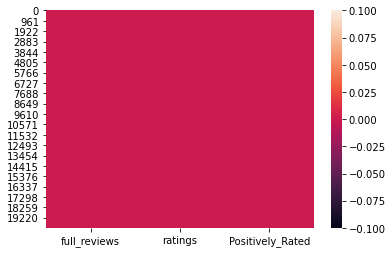

In [14]:
print(df.isnull().sum())
print(sns.heatmap(df.isnull()))

In [15]:
df.skew()

ratings            -1.797438
Positively_Rated   -1.857549
dtype: float64

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
df['length'] = df['full_reviews'].str.len()
df.head(2)

,full_reviews,ratings,Positively_Rated,length
0,First of all thanks to flipkart for excellent ...,2,1,262
1,"overall good product, mobile colour is good i ...",5,2,344


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Convert all messages to lower case
df['full_reviews'] = df['full_reviews'].str.lower()

# Replace email addresses with 'email'
df['full_reviews'] = df['full_reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['full_reviews'] = df['full_reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['full_reviews'] = df['full_reviews'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['full_reviews'] = df['full_reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['full_reviews'] = df['full_reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['full_reviews'] = df['full_reviews'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['full_reviews'] = df['full_reviews'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


lem=WordNetLemmatizer()
df['full_reviews'] = df['full_reviews'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [21]:
df['clean_length'] = df.full_reviews.str.len()
df.head()

,full_reviews,ratings,Positively_Rated,length,clean_length
0,first thanks flipkart excellent service. other...,2,1,262,209
1,"overall good product, mobile colour good liked...",5,2,344,271
2,mobile good feature battery seems much good pe...,4,2,356,249
3,got phone superb exchange deal camera good upt...,5,2,215,164
4,gift mom. joy eye tell everything. fantabulous...,5,2,253,196


In [22]:
# Total length removal
print ('Original Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Original Length 1024091
Clean Length 789567


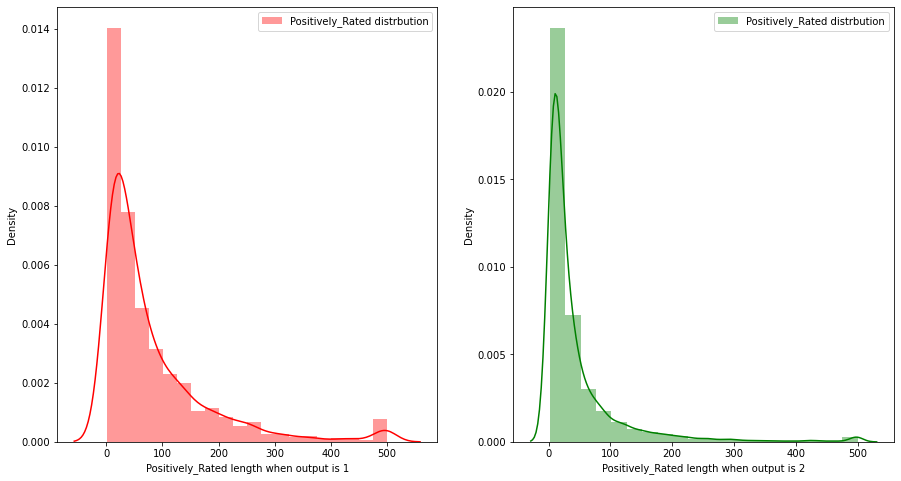

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['Positively_Rated']==1]['length'],bins=20,ax=ax[0],label='Positively_Rated distrbution',color='r')
ax[0].set_xlabel('Positively_Rated length when output is 1')
ax[0].legend()

sns.distplot(df[df['Positively_Rated']==2]['length'],bins=20,ax=ax[1],label='Positively_Rated distrbution',color='g')
ax[1].set_xlabel('Positively_Rated length when output is 2')
ax[1].legend()

plt.show()

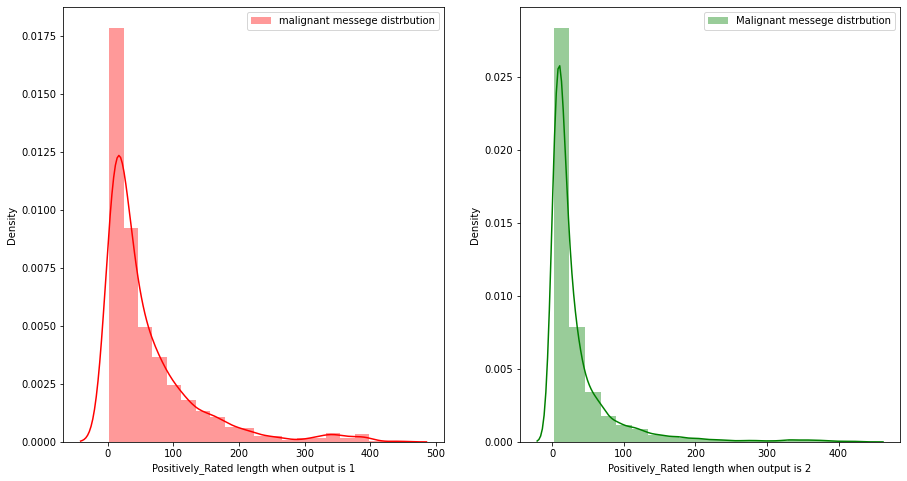

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['Positively_Rated']==1]['clean_length'],bins=20,ax=ax[0],label='malignant messege distrbution',color='r')
ax[0].set_xlabel('Positively_Rated length when output is 1')
ax[0].legend()

sns.distplot(df[df['Positively_Rated']==2]['clean_length'],bins=20,ax=ax[1],label='Malignant messege distrbution',color='g')
ax[1].set_xlabel('Positively_Rated length when output is 2')
ax[1].legend()

plt.show()

# Create Word Clouds

In [25]:
# Import Libraries
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
def clean_text_data(text_data):
    word_list = []
    for val in text_data:
        text = str(val)
        text = text.lower()
        tokens = word_tokenize(text)
        words = [word for word in tokens if word.isalpha()]
        for w in words:
            word_list.append(w)
    return(word_list)

In [27]:
def create_cloud_graph(string):
    stopwords= set(STOPWORDS)|{'mobile', 'phone','tv','battery', 'flipcart','👍👍', 'camera', 'Picture' 'Realme', 'product','use', 'go', 'need', 'brand', 'using', 'looks'}
    s = " "
    ww = s.join(string)
    wordcloud = WordCloud(width=1600, height=800, max_words = 100, stopwords = stopwords).generate(ww)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

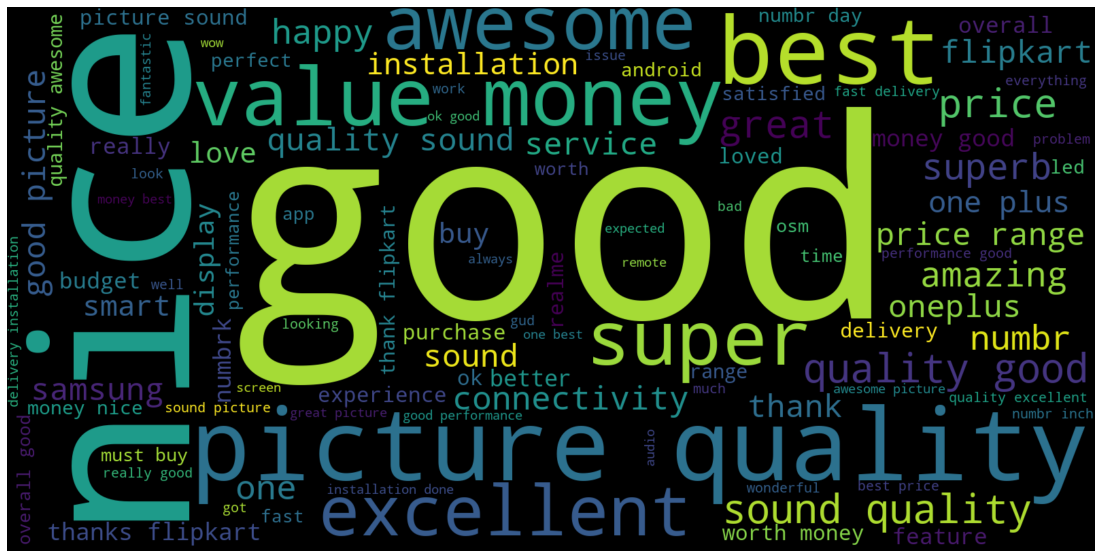

In [29]:
#Rating = 5
rating5 = clean_text_data(df[df['ratings']==5]['full_reviews'])
create_cloud_graph(rating5)

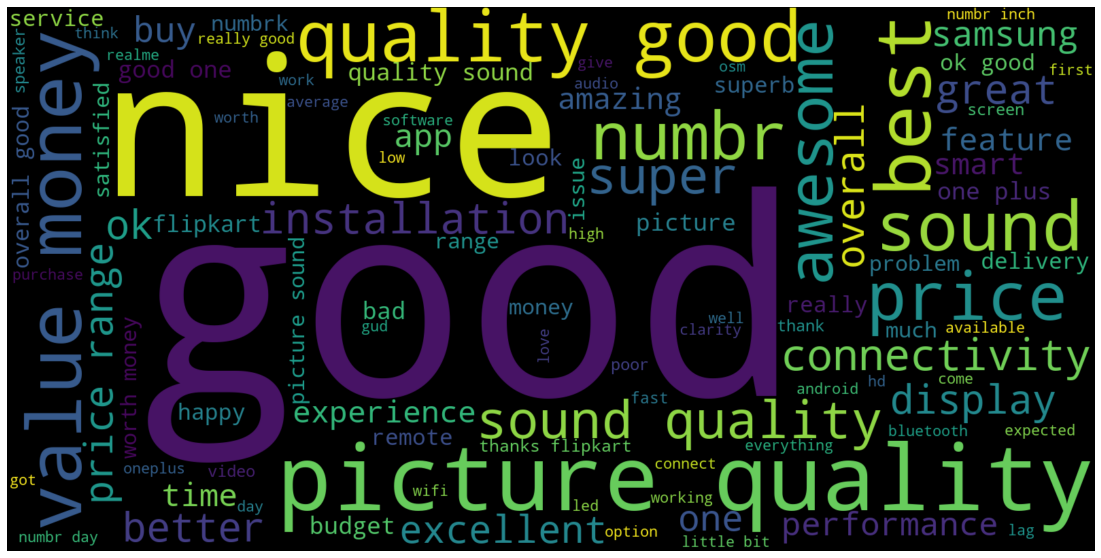

In [30]:
#Rating = 4
rating4 = clean_text_data(df[df['ratings']==4]['full_reviews'])
create_cloud_graph(rating4)

When Rating Score is 5 or 4, most of the frequently used words in the review texts are positive, such as good, good product, nice, best, great,awesome.

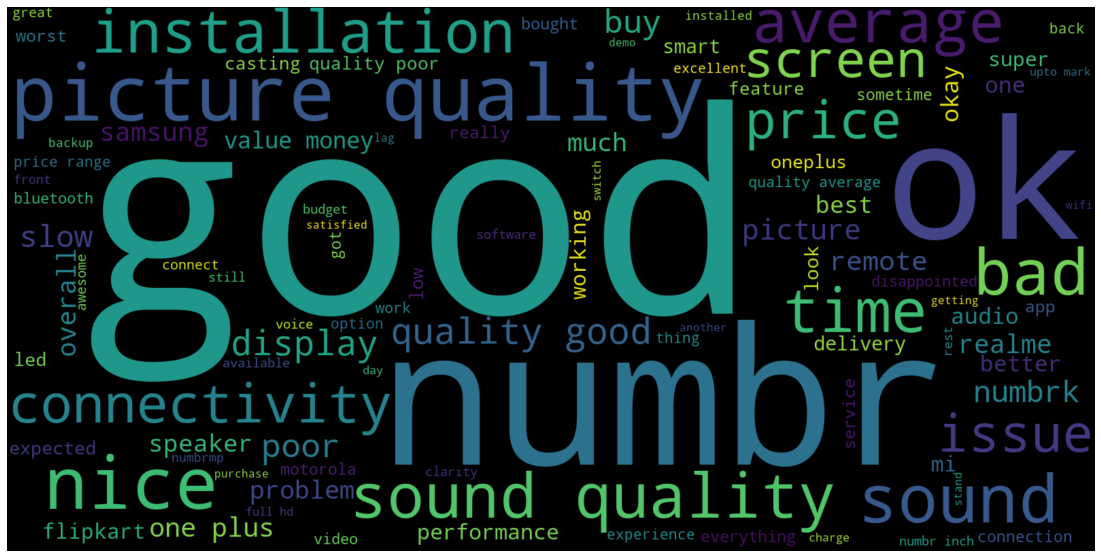

In [31]:
#Rating = 3
rating3 = clean_text_data(df[df['ratings']==3]['full_reviews'])
create_cloud_graph(rating3)

When Rating Score is 3, top words are good, sound, nice. However, there are not just positive words used in the review texts, but also negative words appear, such as disappointed, bad.

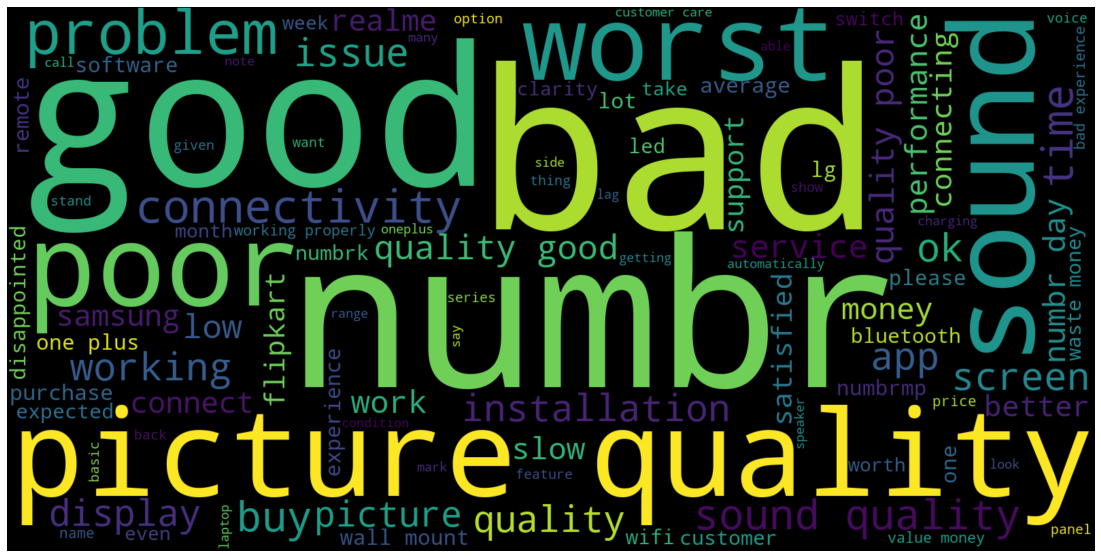

In [32]:
#Rating = 2
rating2 = clean_text_data(df[df['ratings']==2]['full_reviews'])
create_cloud_graph(rating2)

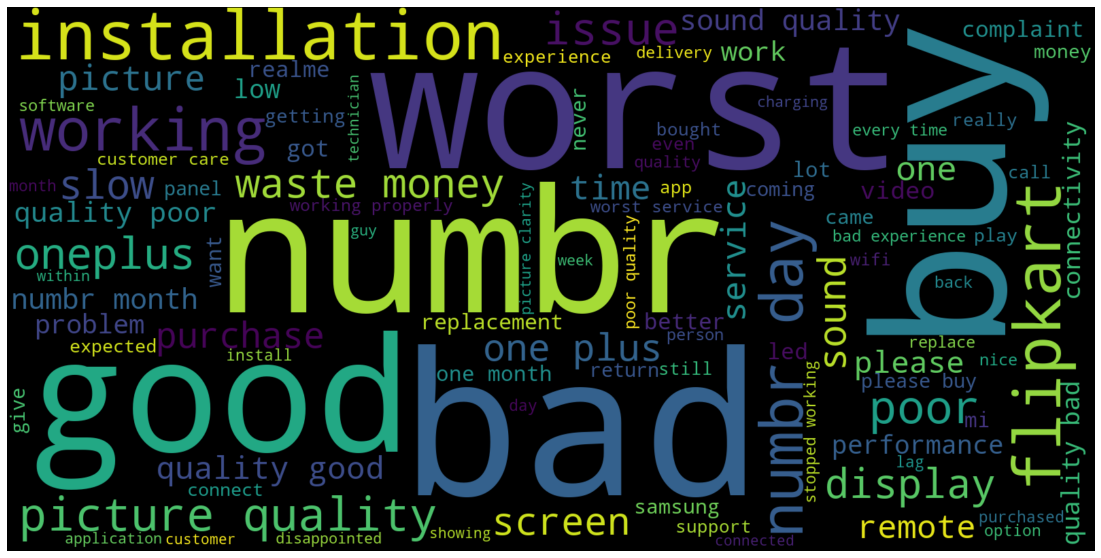

In [33]:
#Rating = 1
rating1 = clean_text_data(df[df['ratings']==1]['full_reviews'])
create_cloud_graph(rating1)

When Rating Score is 1 or 2, there are more negative words than positive words used in the review texts, such as bad, worst, waste money, slow, disappointed, unfortunately.

# Vectorize Text Data

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#Count how many times each term shows up in each review
def text_vectorizing_process(string):
    return [word for word in string.split()]

In [36]:
# Using the CountVectorizer class to get a count of words from the review text
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(text_vectorizing_process, ngram_range=(1,2), min_df=.005, max_df=.9)
cvec.fit(df['full_reviews'])

TypeError: __init__() takes 1 positional argument but 2 positional arguments (and 3 keyword-only arguments) were given

In [37]:
len(cvec.vocabulary_)

NameError: name 'cvec' is not defined

In [38]:
# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer
 
# Initialize empty array
# to append clean text
corpus = []
# 1000 (reviews) rows to clean
for i in range(0, 1000):
     
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', df['full_reviews'][i])
     
    # convert all cases to lower cases
    review = review.lower()
     
    # split to array(default delimiter is " ")
    review = review.split()
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word
    # in string array at ith row   
    review = [ps.stem(word) for word in review
              if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review) 
     
    # append each string to create
    # array of clean text
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
 
# y contains answers if review
# is positive or negative
y = df.iloc[:, 1].values

In [40]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['full_reviews'])
x = features

In [41]:
df.head()

,full_reviews,ratings,Positively_Rated,length,clean_length
0,first thanks flipkart excellent service. other...,2,1,262,209
1,"overall good product, mobile colour good liked...",5,2,344,271
2,mobile good feature battery seems much good pe...,4,2,356,249
3,got phone superb exchange deal camera good upt...,5,2,215,164
4,gift mom. joy eye tell everything. fantabulous...,5,2,253,196


In [42]:
y=df.iloc[:,1]
y

0        2
1        5
2        4
3        5
4        5
        ..
20158    5
20159    4
20160    5
20161    5
20162    5
Name: ratings, Length: 20163, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [45]:
np.bincount(y)

array([    0,  1322,   483,  1416,  4469, 12473], dtype=int64)

In [46]:
trainy.value_counts()

5    12473
4    12473
3    12473
2    12473
1    12473
Name: ratings, dtype: int64

In [47]:
y.value_counts()

5    12473
4     4469
3     1416
1     1322
2      483
Name: ratings, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=0.22,random_state=45)

In [50]:
train_x.shape

(48644, 4718)

In [51]:
train_y.shape

(48644,)

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [53]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(train_x,train_y)
y_pred_train = DT.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, y_pred_train)))
y_pred_test = DT.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,y_pred_test)))
print(confusion_matrix(test_y,y_pred_test))
print(classification_report(test_y,y_pred_test))

Training accuracy is 0.8620179261573884
Test accuracy is 0.7831061875956563
[[2471   60   40   75   44]
 [  60 2471  117   36   16]
 [  55   55 2042  455  192]
 [  22   17  135 1998  553]
 [  39   27  116  862 1763]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.93      2690
           2       0.94      0.92      0.93      2700
           3       0.83      0.73      0.78      2799
           4       0.58      0.73      0.65      2725
           5       0.69      0.63      0.66      2807

    accuracy                           0.78     13721
   macro avg       0.80      0.78      0.79     13721
weighted avg       0.79      0.78      0.79     13721



# Auc Roc Curve

In [54]:
probas=DT.predict_proba(test_x)

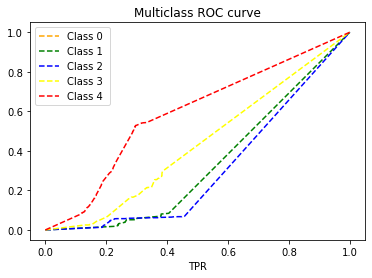

In [55]:
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
thresh={}

n_class=5

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(test_y,probas[:,i],pos_label=i)
    
#plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 ')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 ')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 ')
plt.plot(fpr[3],tpr[3],linestyle='--',color='yellow',label='Class 3 ')
plt.plot(fpr[4],tpr[4],linestyle='--',color='red',label='Class 4 ')

plt.title("Multiclass ROC curve")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend(loc='best')
plt.savefig("Multiclass ROC",dpi=300)

In [56]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(train_x, train_y)
y_pred_train = RF.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, y_pred_train)))
y_pred_test = RF.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,y_pred_test)))
print(confusion_matrix(test_y,y_pred_test))
print(classification_report(test_y,y_pred_test))

Training accuracy is 0.8620179261573884
Test accuracy is 0.8184534654908534
[[2563   25   24   52   26]
 [  38 2521  104   31    6]
 [  37   38 2168  395  161]
 [  11   11  107 2134  462]
 [  22   20  100  821 1844]]
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      2690
           2       0.96      0.93      0.95      2700
           3       0.87      0.77      0.82      2799
           4       0.62      0.78      0.69      2725
           5       0.74      0.66      0.70      2807

    accuracy                           0.82     13721
   macro avg       0.83      0.82      0.82     13721
weighted avg       0.83      0.82      0.82     13721



In [57]:
probas=RF.predict_proba(test_x)

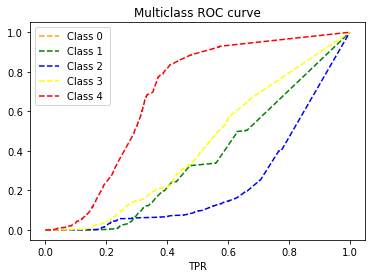

In [58]:
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
thresh={}

n_class=5

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(test_y,probas[:,i],pos_label=i)
    
#plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 ')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 ')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 ')
plt.plot(fpr[3],tpr[3],linestyle='--',color='yellow',label='Class 3 ')
plt.plot(fpr[4],tpr[4],linestyle='--',color='red',label='Class 4 ')

plt.title("Multiclass ROC curve")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend(loc='best')
plt.savefig("Multiclass ROC",dpi=300)

In [60]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(train_x, train_y)
y_pred_train = ada.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, y_pred_train)))
y_pred_test = ada.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,y_pred_test)))
print(confusion_matrix(test_y,y_pred_test))
print(classification_report(test_y,y_pred_test))

Training accuracy is 0.49286654058054435
Test accuracy is 0.4897602215581955
[[1587  591  290  131   91]
 [ 662 1388  539   60   51]
 [ 234  376 1176  695  318]
 [  76   61  445 1319  824]
 [  57   48  315 1137 1250]]
              precision    recall  f1-score   support

           1       0.61      0.59      0.60      2690
           2       0.56      0.51      0.54      2700
           3       0.43      0.42      0.42      2799
           4       0.39      0.48      0.43      2725
           5       0.49      0.45      0.47      2807

    accuracy                           0.49     13721
   macro avg       0.50      0.49      0.49     13721
weighted avg       0.50      0.49      0.49     13721



In [61]:
probas=ada.predict_proba(test_x)

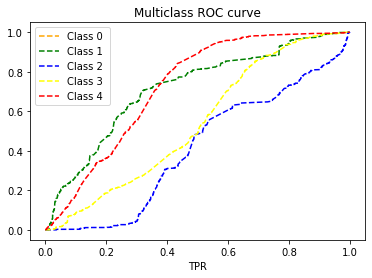

In [62]:
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
thresh={}

n_class=5

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(test_y,probas[:,i],pos_label=i)
    
#plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 ')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 ')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 ')
plt.plot(fpr[3],tpr[3],linestyle='--',color='yellow',label='Class 3 ')
plt.plot(fpr[4],tpr[4],linestyle='--',color='red',label='Class 4 ')

plt.title("Multiclass ROC curve")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend(loc='best')
plt.savefig("Multiclass ROC",dpi=300)

In [63]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(train_x, train_y)
y_pred_train = knn.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, y_pred_train)))
y_pred_test = knn.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,y_pred_test)))
print(confusion_matrix(test_y,y_pred_test))
print(classification_report(test_y,y_pred_test))

Training accuracy is 0.732299975330976
Test accuracy is 0.700313388237009
[[2482  103   32   10   63]
 [  32 2471  163   19   15]
 [  28  142 2059  117  453]
 [  48  151  391 1199  936]
 [  91  270  483  565 1398]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.92      2690
           2       0.79      0.92      0.85      2700
           3       0.66      0.74      0.69      2799
           4       0.63      0.44      0.52      2725
           5       0.49      0.50      0.49      2807

    accuracy                           0.70     13721
   macro avg       0.70      0.70      0.70     13721
weighted avg       0.70      0.70      0.69     13721



In [64]:
probas=knn.predict_proba(test_x)

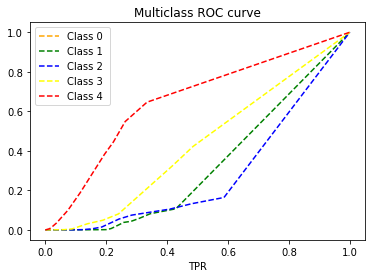

In [65]:
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
thresh={}

n_class=5

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(test_y,probas[:,i],pos_label=i)
    
#plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='orange',label='Class 0 ')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 ')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 ')
plt.plot(fpr[3],tpr[3],linestyle='--',color='yellow',label='Class 3 ')
plt.plot(fpr[4],tpr[4],linestyle='--',color='red',label='Class 4 ')

plt.title("Multiclass ROC curve")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend(loc='best')
plt.savefig("Multiclass ROC",dpi=300)

The best model is Random Forest Classifier. Since the difference between the percentages score of cross validation and r2_score is optimum.

# Model Saving

In [66]:
import pickle
filename = 'classifier_rating_review.pkl'
pickle.dump(RF, open(filename, 'wb'))

# Conclusion

In [68]:
import numpy as np
a=np.array(test_y)
a

array([4, 2, 4, ..., 3, 5, 5], dtype=int64)

In [69]:
predicted=np.array(RF.predict(test_x))
predicted

array([4, 3, 4, ..., 3, 4, 5], dtype=int64)

In [71]:
# df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,4,4
1,2,3
2,4,4
3,4,5
4,5,4
...,...,...
13716,5,5
13717,2,3
13718,3,3
13719,5,4


# From the above table the model is predicted the values with 85 percent accuracy